In [57]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [58]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [59]:
iris = load_iris()

In [60]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df[['sepal length (cm)','sepal width (cm)']]
data_class = iris.target

In [61]:
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data_class, test_size=0.25)

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
lda = LinearDiscriminantAnalysis()

In [65]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
lda.predict(X_test)

array([2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1])

In [67]:
lda.means_

array([[4.97948718, 3.38717949],
       [5.94166667, 2.76944444],
       [6.64054054, 2.98918919]])

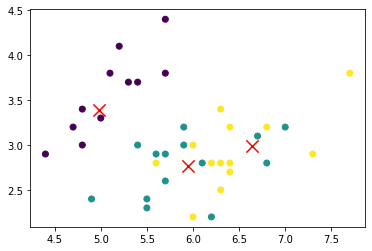

In [69]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='x')

In [70]:
from sklearn.cluster import KMeans

In [98]:
kmeans = KMeans(n_clusters=4)
X_scaled = df
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 1, 2, 2, 2, 0, 2, 0, 2, 3, 2, 3, 3, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 3, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0])

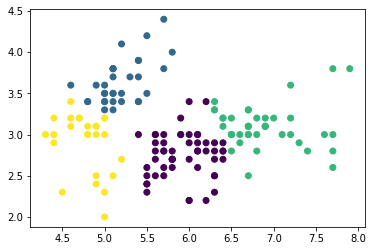

In [102]:
plt.scatter(X_scaled['sepal length (cm)'], X_scaled['sepal width (cm)'], c=clusters)

In [100]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

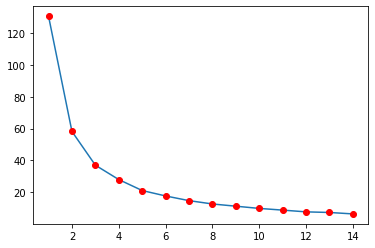

In [109]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')